# Predict Customer Life-time Value (CLV)

In [1]:
#importing necessary libraries

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

In [2]:
# To filter/truncate warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#reading the dataset

data = pd.read_csv('train.csv',na_values=['?','NA,NA'])
data.head()

,CustomerID,Customer.Lifetime.Value,Coverage,Education,EmploymentStatus,Gender,Income,Location.Geo,Location.Code,Marital.Status,...,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Policy.Type,Policy,Renew.Offer.Type,Sales.Channel,Total.Claim.Amount,Vehicle.Class,Vehicle.Size
0,5917,7824.372789,Basic,Bachelor,Unemployed,F,0.0,"17.7,77.7",Urban,Married,...,33,NaN,2.0,Personal Auto,Personal L2,Offer2,Branch,267.214383,Four-Door Car,2.0
1,2057,8005.964669,Basic,College,Employed,M,63357.0,"28.8,76.6",Suburban,Married,...,42,0.0,5.0,Personal Auto,Personal L2,Offer2,Agent,565.508572,SUV,2.0
2,4119,8646.504109,Basic,High School or Below,Employed,F,64125.0,"21.6,88.4",Urban,Married,...,44,0.0,3.0,Personal Auto,Personal L1,Offer2,Branch,369.818708,SUV,1.0
3,1801,9294.088719,Basic,College,Employed,M,67544.0,"19,72.5",Suburban,Married,...,15,NaN,3.0,Corporate Auto,Corporate L3,Offer1,Branch,556.800000,SUV,3.0
4,9618,5595.971365,Basic,Bachelor,Retired,F,19651.0,"19.1,74.7",Suburban,Married,...,68,0.0,5.0,Personal Auto,Personal L1,Offer2,Web,345.600000,Two-Door Car,3.0


In [4]:
data.columns = data.columns.str.replace("[.]", "")
data.head()

,CustomerID,CustomerLifetimeValue,Coverage,Education,EmploymentStatus,Gender,Income,LocationGeo,LocationCode,MaritalStatus,...,MonthsSincePolicyInception,NumberofOpenComplaints,NumberofPolicies,PolicyType,Policy,RenewOfferType,SalesChannel,TotalClaimAmount,VehicleClass,VehicleSize
0,5917,7824.372789,Basic,Bachelor,Unemployed,F,0.0,"17.7,77.7",Urban,Married,...,33,NaN,2.0,Personal Auto,Personal L2,Offer2,Branch,267.214383,Four-Door Car,2.0
1,2057,8005.964669,Basic,College,Employed,M,63357.0,"28.8,76.6",Suburban,Married,...,42,0.0,5.0,Personal Auto,Personal L2,Offer2,Agent,565.508572,SUV,2.0
2,4119,8646.504109,Basic,High School or Below,Employed,F,64125.0,"21.6,88.4",Urban,Married,...,44,0.0,3.0,Personal Auto,Personal L1,Offer2,Branch,369.818708,SUV,1.0
3,1801,9294.088719,Basic,College,Employed,M,67544.0,"19,72.5",Suburban,Married,...,15,NaN,3.0,Corporate Auto,Corporate L3,Offer1,Branch,556.800000,SUV,3.0
4,9618,5595.971365,Basic,Bachelor,Retired,F,19651.0,"19.1,74.7",Suburban,Married,...,68,0.0,5.0,Personal Auto,Personal L1,Offer2,Web,345.600000,Two-Door Car,3.0


<b><h2>1. Understanding the dataset</h2>

In [5]:
#To see maximum no of columns
pd.pandas.set_option('display.max_columns',None)
data.head()


,CustomerID,CustomerLifetimeValue,Coverage,Education,EmploymentStatus,Gender,Income,LocationGeo,LocationCode,MaritalStatus,MonthlyPremiumAuto,MonthsSinceLastClaim,MonthsSincePolicyInception,NumberofOpenComplaints,NumberofPolicies,PolicyType,Policy,RenewOfferType,SalesChannel,TotalClaimAmount,VehicleClass,VehicleSize
0,5917,7824.372789,Basic,Bachelor,Unemployed,F,0.0,"17.7,77.7",Urban,Married,67.0,2,33,NaN,2.0,Personal Auto,Personal L2,Offer2,Branch,267.214383,Four-Door Car,2.0
1,2057,8005.964669,Basic,College,Employed,M,63357.0,"28.8,76.6",Suburban,Married,101.0,26,42,0.0,5.0,Personal Auto,Personal L2,Offer2,Agent,565.508572,SUV,2.0
2,4119,8646.504109,Basic,High School or Below,Employed,F,64125.0,"21.6,88.4",Urban,Married,108.0,3,44,0.0,3.0,Personal Auto,Personal L1,Offer2,Branch,369.818708,SUV,1.0
3,1801,9294.088719,Basic,College,Employed,M,67544.0,"19,72.5",Suburban,Married,116.0,2,15,NaN,3.0,Corporate Auto,Corporate L3,Offer1,Branch,556.800000,SUV,3.0
4,9618,5595.971365,Basic,Bachelor,Retired,F,19651.0,"19.1,74.7",Suburban,Married,72.0,3,68,0.0,5.0,Personal Auto,Personal L1,Offer2,Web,345.600000,Two-Door Car,3.0


In [6]:
#Get the dimensions of dataset
data.shape

(9806, 22)

In [7]:
#Checking for duplicate rows
data[data.duplicated(subset=None, keep= 'first')==True]

,CustomerID,CustomerLifetimeValue,Coverage,Education,EmploymentStatus,Gender,Income,LocationGeo,LocationCode,MaritalStatus,MonthlyPremiumAuto,MonthsSinceLastClaim,MonthsSincePolicyInception,NumberofOpenComplaints,NumberofPolicies,PolicyType,Policy,RenewOfferType,SalesChannel,TotalClaimAmount,VehicleClass,VehicleSize


In [8]:
#function to understand dataset 

def understand_data(data) :
    
    return(pd.DataFrame({"Datatype":data.dtypes,
                         "No of NAs":data.isna().sum(),
                         "No of Levels":data.nunique(axis=0,dropna=True),
                         "Levels": data.apply(lambda x: str(x.unique()),axis=0)}))

In [9]:
understand_data(data)

,Datatype,No of NAs,No of Levels,Levels
CustomerID,int64,0,9806,[ 5917 2057 4119 ... 8767 9900 11323]
CustomerLifetimeValue,float64,0,6477,[ 7824.372789 8005.964669 8646.504109 ... 20...
Coverage,object,925,3,['Basic' 'Extended' nan 'Premium']
Education,object,129,5,['Bachelor' 'College' 'High School or Below' '...
EmploymentStatus,object,118,5,['Unemployed' 'Employed' 'Retired' 'Medical Le...
Gender,object,129,2,['F' 'M' nan]
Income,float64,118,4621,[ 0. 63357. 64125. ... 26173. 74665. 18017.]
LocationGeo,object,119,2839,"['17.7,77.7' '28.8,76.6' '21.6,88.4' ... '22.3..."
LocationCode,object,119,3,['Urban' 'Suburban' 'Rural' nan]
MaritalStatus,object,129,3,['Married' 'Divorced' 'Single' nan]


In [10]:
# To get numerical and non-numerical columns 
num_cols=data.select_dtypes(include=['int64','float64']).columns
cat_cols=data.select_dtypes(include=['object']).columns
display(num_cols)
display(cat_cols)

Index(['CustomerID', 'CustomerLifetimeValue', 'Income', 'MonthlyPremiumAuto',
       'MonthsSinceLastClaim', 'MonthsSincePolicyInception',
       'NumberofOpenComplaints', 'NumberofPolicies', 'TotalClaimAmount',
       'VehicleSize'],
      dtype='object')

Index(['Coverage', 'Education', 'EmploymentStatus', 'Gender', 'LocationGeo',
       'LocationCode', 'MaritalStatus', 'PolicyType', 'Policy',
       'RenewOfferType', 'SalesChannel', 'VehicleClass'],
      dtype='object')

In [11]:
# Check the summary statistics of train data
data.select_dtypes(include=['int64','float64']).describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
CustomerID,9806.0,5778.381807,3343.286093,1.000000,2879.250000,5783.000000,8678.750000,11573.000000
CustomerLifetimeValue,9806.0,7998.047015,6848.055899,1898.007675,4013.949039,5780.182197,8960.280213,83325.381190
Income,9688.0,37511.054604,30292.974468,0.000000,0.000000,33767.500000,62018.000000,99981.000000
MonthlyPremiumAuto,9012.0,93.340657,34.417763,61.000000,68.750000,83.000000,109.000000,297.000000
MonthsSinceLastClaim,9806.0,15.143993,10.004327,0.000000,6.000000,14.000000,23.000000,35.000000
MonthsSincePolicyInception,9806.0,48.165001,27.963630,0.000000,24.000000,48.000000,71.750000,99.000000
NumberofOpenComplaints,8988.0,0.379172,0.896427,0.000000,0.000000,0.000000,0.000000,5.000000
NumberofPolicies,9685.0,2.960351,2.389801,1.000000,1.000000,2.000000,4.000000,9.000000
TotalClaimAmount,9806.0,438.266734,293.502301,0.099007,280.352767,384.007015,553.540973,2893.239678
VehicleSize,9680.0,2.089773,0.538524,1.000000,2.000000,2.000000,2.000000,3.000000


<h2> 2. EDA</h2>

<h4>2.1 Univariate Analyis-Numerical features


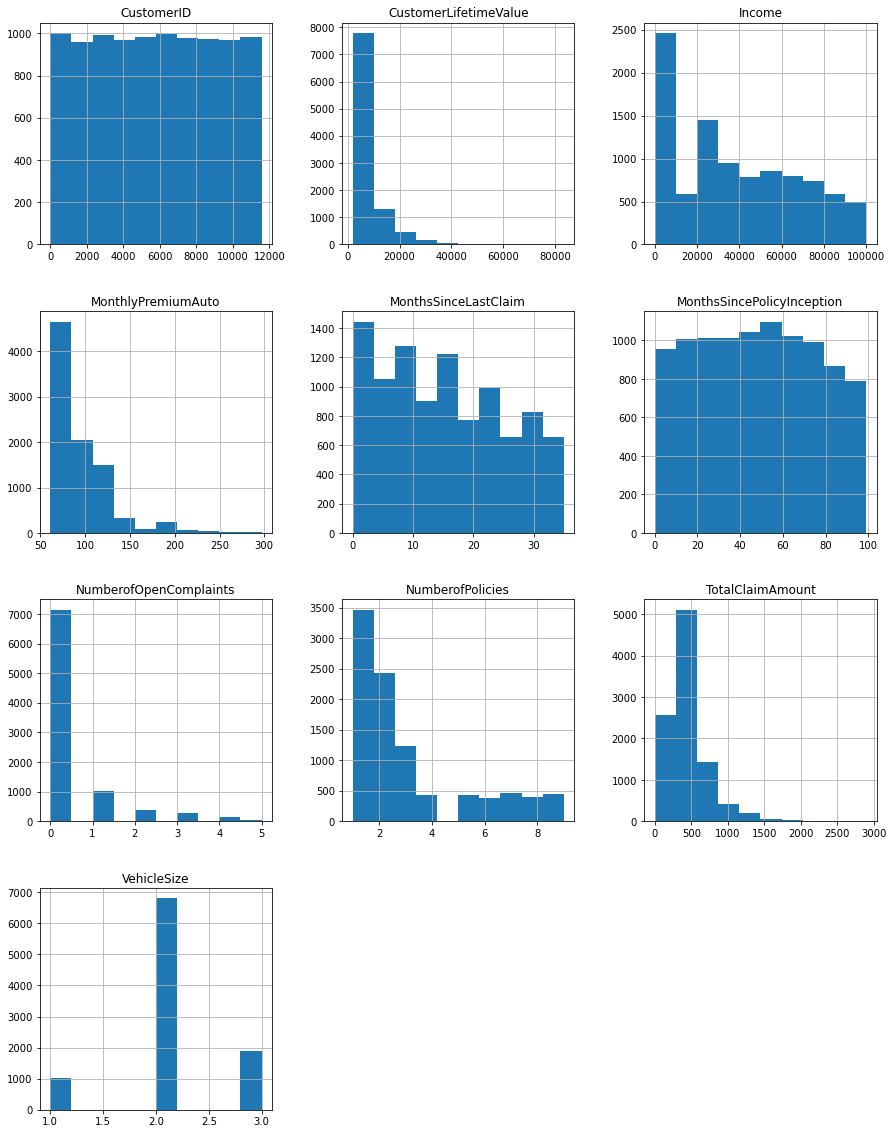

In [12]:
# Histogram to check the distribution of all the numerical columns
data.select_dtypes(include=['int64','float64']).hist(figsize = (15,20))
plt.show()

1. Target Variable -CustomerLifetimeValue CLV is heavily right Skewed
2. Continuous variables - Income, MonthlyPremiumAuto and TotalClaimAmount- We will need to check for skewness to see if they are normally distributed. 
3. Discetre Variables - MonthsSinceLastClaim,MonthsSincePolicyInception,NumberofOpenComplaints, NumberofPolicies,vehicleSize. They will be considered as categorical variables while creating model. 

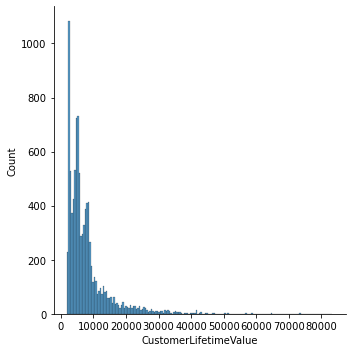

In [13]:
#Target Varibale CLV
sns.displot(data['CustomerLifetimeValue'])
plt.show()

In [14]:
data['CustomerLifetimeValue'].skew()  
#skew value of 0 is perfectly normal. Here  since its >3, we know its heavily positively skewed.
#We will check for outliers in preprocessing stage. 

3.0273434456147257

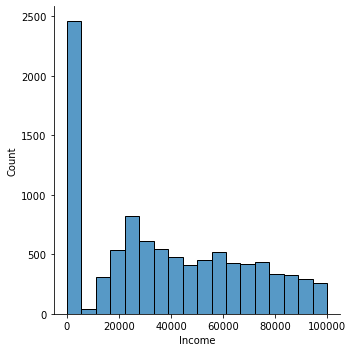

In [15]:
#Income
sns.displot(data['Income'])
plt.show()

In [16]:
data['Income'].skew() 
#Since the value is close to zero, its an almost normal distribution. 

0.28776790183116585

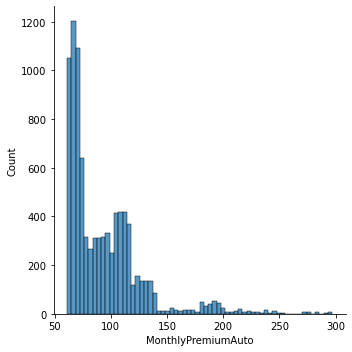

In [17]:
#Income
sns.displot(data['MonthlyPremiumAuto'])
plt.show()

In [18]:
data['MonthlyPremiumAuto'].skew()
#Positively skewed.
#We will check for outliers in preprocessing stage.

2.106709722628019

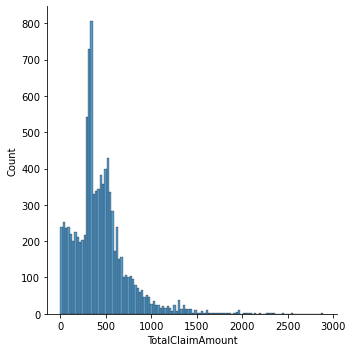

In [19]:
#Total Claim Amount
sns.displot(data['TotalClaimAmount'])
plt.show()

In [20]:
data['TotalClaimAmount'].skew()
#Positively skewed.
#We will check for outliers in preprocessing stage.

1.7312472506339973

<h4>2.2 Bivariate Analyis - Numeric feature</h4>

CustomerLifetimeValue vs <br>
- Income
- MonthlyPremiumAuto
- MonthsSinceLastClaim
- MonthsSincePolicyInception
- NumberofOpenComplaints
- NumberofPolicies
- TotalClaimAmount
- VehicleSize

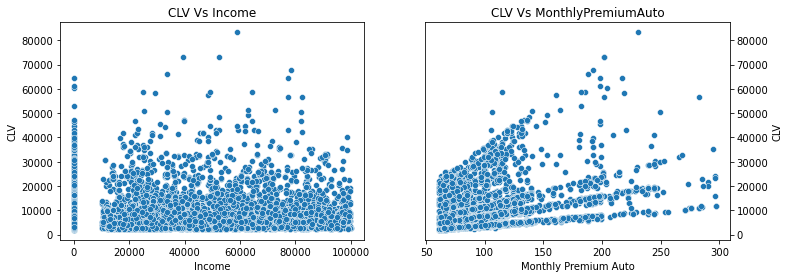

In [21]:
#CLV Vs Income/ CLV Vs MonthlyPremiumAuto
fig,axes = plt.subplots(1,2,figsize = (12,4))
sns.scatterplot(x="Income",y="CustomerLifetimeValue",data=data,ax=axes[0])
sns.scatterplot(x="MonthlyPremiumAuto",y="CustomerLifetimeValue",data=data,ax=axes[1])

axes[0].set(xlabel='Income',ylabel='CLV',title = 'CLV Vs Income')
axes[1].set(xlabel='Monthly Premium Auto',ylabel='CLV',title = 'CLV Vs MonthlyPremiumAuto')
axes[1].yaxis.set_label_position('right')
axes[1].yaxis.tick_right()
plt.show()

- There is no linear relationship between income and CLV
- Linear relationship between Monthly auto premium and CLV. 

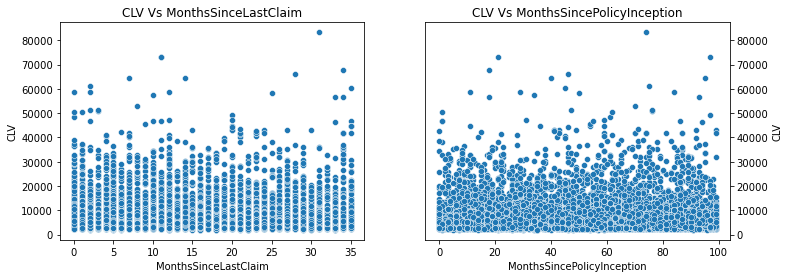

In [22]:
#CLV Vs MonthsSinceLastClaim/ CLV Vs MonthsSincePolicyInception
fig,axes = plt.subplots(1,2,figsize = (12,4))
sns.scatterplot(x="MonthsSinceLastClaim",y="CustomerLifetimeValue",data=data,ax=axes[0])
sns.scatterplot(x="MonthsSincePolicyInception",y="CustomerLifetimeValue",data=data,ax=axes[1])

axes[0].set(xlabel='MonthsSinceLastClaim',ylabel='CLV',title = 'CLV Vs MonthsSinceLastClaim')
axes[1].set(xlabel='MonthsSincePolicyInception',ylabel='CLV',title = 'CLV Vs MonthsSincePolicyInception')
axes[1].yaxis.set_label_position('right')
axes[1].yaxis.tick_right()
plt.show()

There is no linear relationship between MonthsSinceLastClaim,MonthsSincePolicyInception and CLV

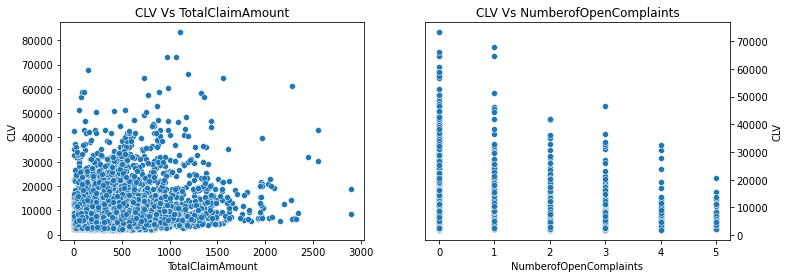

In [23]:
#CLV Vs TotalClaimAmount/ CLV Vs NumberofOpenComplaints
fig,axes = plt.subplots(1,2,figsize = (12,4))
sns.scatterplot(x="TotalClaimAmount",y="CustomerLifetimeValue",data=data,ax=axes[0])
sns.scatterplot(x="NumberofOpenComplaints",y="CustomerLifetimeValue",data=data,ax=axes[1])

axes[0].set(xlabel='TotalClaimAmount',ylabel='CLV',title = 'CLV Vs TotalClaimAmount')
axes[1].set(xlabel='NumberofOpenComplaints',ylabel='CLV',title = 'CLV Vs NumberofOpenComplaints')
axes[1].yaxis.set_label_position('right')
axes[1].yaxis.tick_right()
plt.show()

- Positive Linear relationship between CLV and Total Claim Amount.
- Negative relationship between CLV and Number of open complaint. As number of open complaints are increasing, CLV is decreasing. This is definetly area for improvement for the company. 

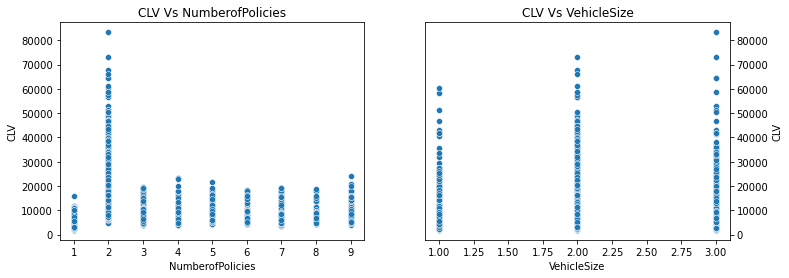

In [24]:
#CLV Vs NumberofPolicies/ CLV Vs VehicleSize
fig,axes = plt.subplots(1,2,figsize = (12,4))
sns.scatterplot(x="NumberofPolicies",y="CustomerLifetimeValue",data=data,ax=axes[0])
sns.scatterplot(x="VehicleSize",y="CustomerLifetimeValue",data=data,ax=axes[1])

axes[0].set(xlabel='NumberofPolicies',ylabel='CLV',title = 'CLV Vs NumberofPolicies')
axes[1].set(xlabel='VehicleSize',ylabel='CLV',title = 'CLV Vs VehicleSize')
axes[1].yaxis.set_label_position('right')
axes[1].yaxis.tick_right()
plt.show()

- Not seeing a specific pattern in Number of policies Vs CLV. Looks like after taking more than one policy, the CLV averages to the almost same. 
- As Vehicle Size increases, CLV increases.

<h4>2.3 Univariate Analysis - Categorical Features </h4>
'Coverage', 'Education', 'EmploymentStatus', 'Gender', 'LocationGeo','LocationCode', 'MaritalStatus',
'PolicyType', 'Policy','RenewOfferType', 'SalesChannel', 'VehicleClass'

In [25]:
#summary statistics for Categorical features
data.select_dtypes(include=['object']).describe().T

,count,unique,top,freq
Coverage,8881,3,Basic,5361
Education,9677,5,Bachelor,2934
EmploymentStatus,9688,5,Employed,6020
Gender,9677,2,F,4985
LocationGeo,9687,2839,"19.2,72.4",26
LocationCode,9687,3,Suburban,6204
MaritalStatus,9677,3,Married,5643
PolicyType,8915,3,Personal Auto,6620
Policy,9685,9,Personal L3,3637
RenewOfferType,9678,4,Offer1,3975


In [26]:
#Geo Location-LocationGeo will not be considered here as a special case. 

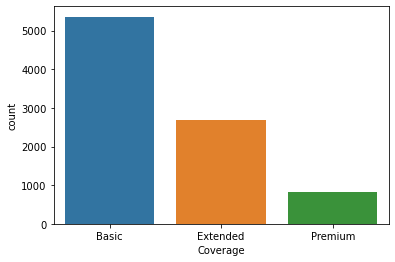

In [27]:
#Coverage
sns.countplot(data['Coverage'])
plt.show()

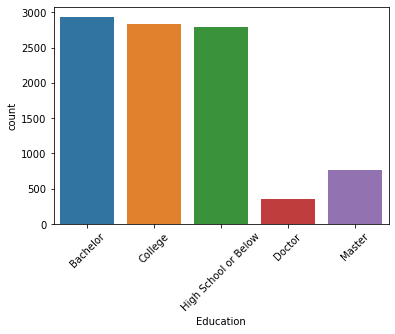

In [28]:
#Education
sns.countplot(data['Education'])
plt.xticks(rotation=45)
plt.show()

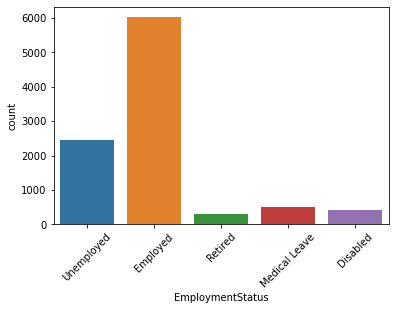

In [29]:
#EmploymentStatus
sns.countplot(data['EmploymentStatus'])
plt.xticks(rotation=45)
plt.show()

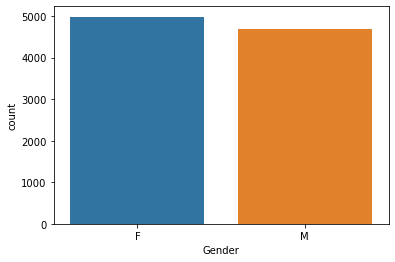

In [30]:
#Gender
sns.countplot(data['Gender'])
plt.show()

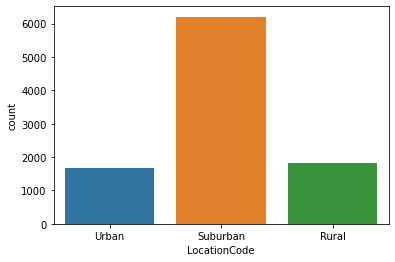

In [31]:
#Location Code
sns.countplot(data['LocationCode'])
plt.show()

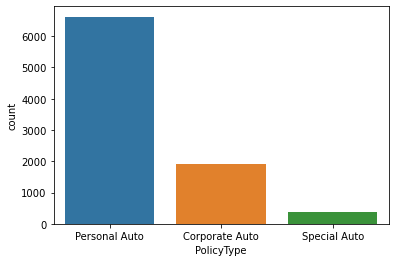

In [32]:
# PolicyType
sns.countplot(data['PolicyType'])
plt.show()

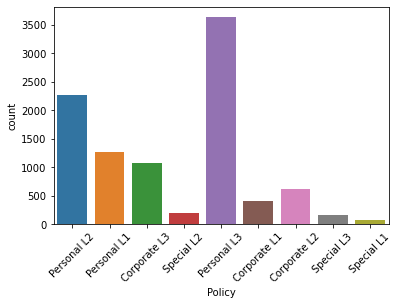

In [33]:
'Policy',
sns.countplot(data['Policy'])
plt.xticks(rotation=45)
plt.show()



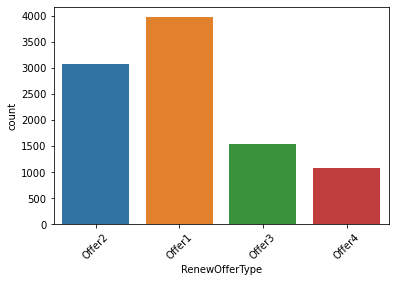

In [34]:
#RenewOfferType
sns.countplot(data['RenewOfferType'])
plt.xticks(rotation=45)
plt.show()

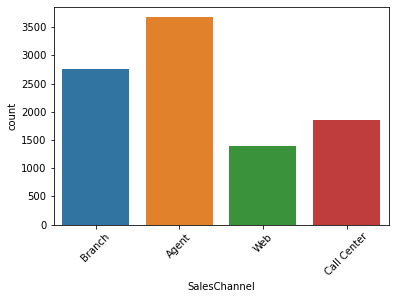

In [35]:
#SalesChannel
sns.countplot(data['SalesChannel'])
plt.xticks(rotation=45)
plt.show()

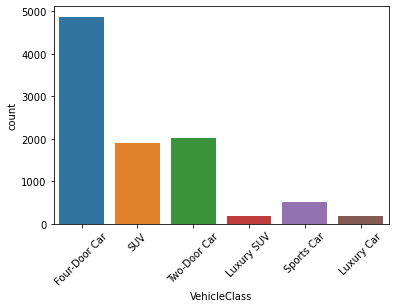

In [36]:
#VehicleClass
sns.countplot(data['VehicleClass'])
plt.xticks(rotation=45)
plt.show()

<h4> 2.4 Bivariate Analysis -Categorical Features</h4>
'Coverage', 'Education', 'EmploymentStatus', 'Gender','LocationCode', 'MaritalStatus', 'PolicyType', 'Policy','RenewOfferType', 'SalesChannel', 'VehicleClass'

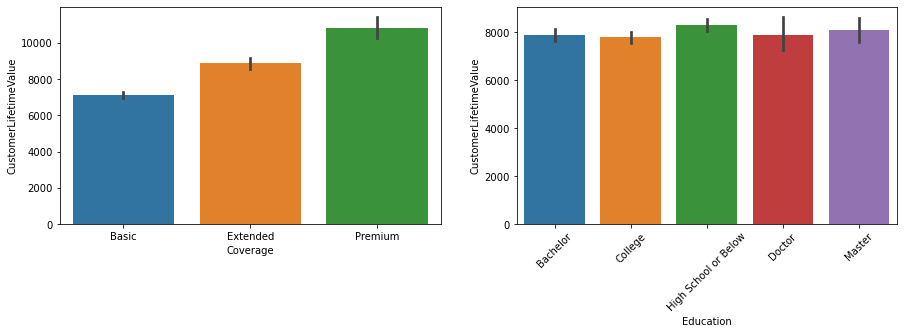

In [37]:
#Effect of Coverage,Education on CLV 
fig,axes = plt.subplots(1,2,figsize = (15,4))
sns.barplot(x='Coverage',y="CustomerLifetimeValue",data=data, ax=axes[0])
sns.barplot(x='Education',y="CustomerLifetimeValue",data=data,ax=axes[1])

plt.xticks(rotation=45)
plt.show()

1. Although, most number of customers have basic plan, Premium coverage holders have more CLV.
2. Education doesnt seem to have significant effect on CLV.

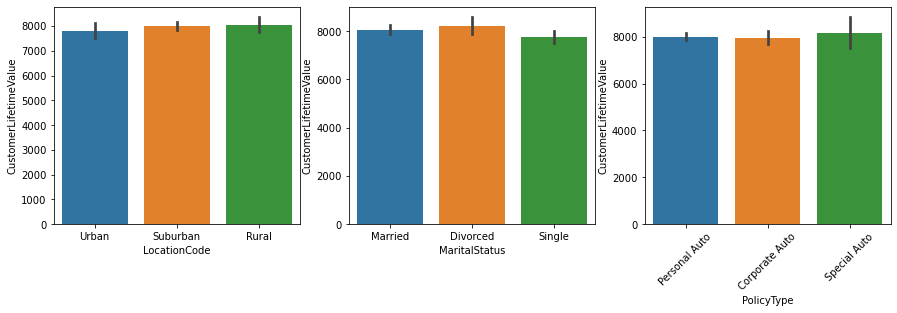

In [38]:
#Effect of 'LocationCode', 'MaritalStatus', 'PolicyType', on CLV 
fig,axes = plt.subplots(1,3,figsize = (15,4))
sns.barplot(x='LocationCode',y="CustomerLifetimeValue",data=data, ax=axes[0])
sns.barplot(x='MaritalStatus',y="CustomerLifetimeValue",data=data,ax=axes[1])
sns.barplot(x='PolicyType',y="CustomerLifetimeValue",data=data,ax=axes[2])
plt.xticks(rotation=45)
plt.show()

1. Urban customers seem to have slightly less CLV. 

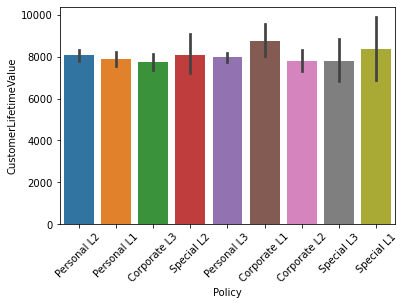

In [39]:
#Effect of 'Policy' on CLV

sns.barplot(x='Policy',y="CustomerLifetimeValue",data=data)
plt.xticks(rotation=45)
plt.show()


Personal L3 policy holders have more CLV. 

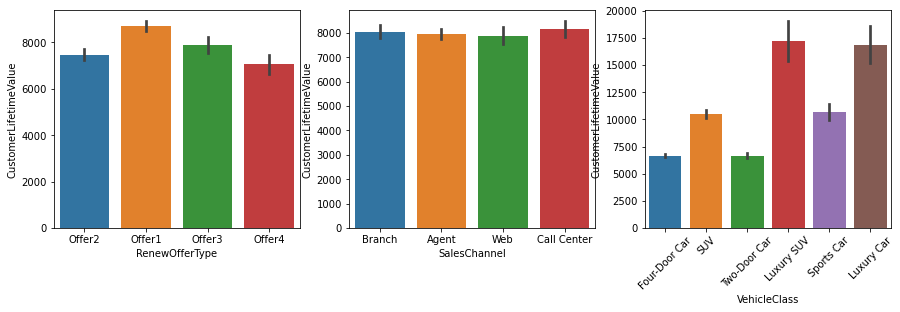

In [40]:
#Effect of 'RenewOfferType', 'SalesChannel', 'VehicleClass' on CLV
fig,axes = plt.subplots(1,3,figsize = (15,4))
sns.barplot(x='RenewOfferType',y="CustomerLifetimeValue",data=data, ax=axes[0])
sns.barplot(x='SalesChannel',y="CustomerLifetimeValue",data=data,ax=axes[1])
sns.barplot(x='VehicleClass',y="CustomerLifetimeValue",data=data,ax=axes[2])
plt.xticks(rotation=45)
plt.show()

1. Offer 1 Renewal type gets more CLV
2. All the sales channels have almost similar CLV
3. Luxury SUV and Car owners have more CLV. Company should concentrate here more. 

<h2>3. Pre-Processing</h2>

<h3>3.1 Data Cleaning</h3>
<h4> 3.1.1 Handling Missing Value</h4>

In [41]:
def find_missing_percent(data):
    '''
    Returns dataframe containing the total missing values and percentage of total
    missing values of a column.
    '''
    miss_df = pd.DataFrame({'ColumnName':[],'TotalMissingVals':[],'PercentMissing':[]})
    for col in data.columns:
        sum_miss_val = data[col].isnull().sum()
        percent_miss_val = round((sum_miss_val/data.shape[0])*100,2)
        miss_df = miss_df.append(dict(zip(miss_df.columns,[col,sum_miss_val,percent_miss_val])),
                                 ignore_index=True)
    return (miss_df[miss_df['PercentMissing']>0.0])

miss_df = find_missing_percent(data)

'''Displays columns with missing values for training set'''

display(miss_df)
print("\n")
print("Number of columns with missing values:",(miss_df.shape[0]))

,ColumnName,TotalMissingVals,PercentMissing
2,Coverage,925.0,9.43
3,Education,129.0,1.32
4,EmploymentStatus,118.0,1.20
5,Gender,129.0,1.32
6,Income,118.0,1.20
7,LocationGeo,119.0,1.21
8,LocationCode,119.0,1.21
9,MaritalStatus,129.0,1.32
10,MonthlyPremiumAuto,794.0,8.10
13,NumberofOpenComplaints,818.0,8.34




Number of columns with missing values: 17


Since the percentage of missing data is very small (<60%, we will attempt to fill the missing values.

In [42]:
#Continuous numerical columns in dataset that will be imputed 
# Income', 'MonthlyPremiumAuto'

#As seen during EDA, income is not much skewed and Since there are a lot of zero entries, using Median to impute.
data['Income'] = data['Income'].fillna(data['Income'].median())

#As seen during EDA, 'MonthlyPremiumAuto' is very much positive skewed. Therefore using Median to impute. 
data['MonthlyPremiumAuto'] = data['MonthlyPremiumAuto'].fillna(data['MonthlyPremiumAuto'].median())


In [43]:
#The following are discrete numerical variables and will be considered as categorical columns for modelling.
#'NumberofOpenComplaints', 'NumberofPolicies', ,'VehicleSize'

#mode imputation will be done for the following columns

cat_cols_all = ['Coverage','Education','EmploymentStatus','Gender','LocationGeo','LocationCode',
                'MaritalStatus','NumberofOpenComplaints','NumberofPolicies','VehicleSize','PolicyType',
               'Policy','RenewOfferType','SalesChannel','VehicleClass']
for i in cat_cols_all:
    data[i] = data[i].fillna(data[i].mode()[0])

In [44]:
#Checking for null values again
#Re-rechecking for missing values. 
miss_df = find_missing_percent(data)
print(miss_df)

Empty DataFrame
Columns: [ColumnName, TotalMissingVals, PercentMissing]
Index: []


<h4>3.2.1 Outlier detection and handling <h4>

As seen in EDA, We will check for outliers in Target variable CLV and continuous variables Income, MonthlyPremiumAuto and TotalClaimAmount

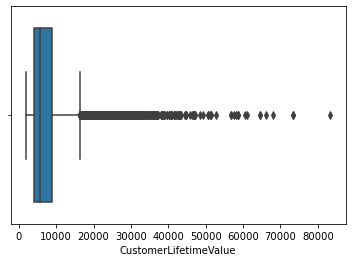

In [45]:
#Target variable analysis 
sns.boxplot(data['CustomerLifetimeValue'])
plt.show()

Although we are seeing outliers in the target variable CLV, this should not be handled as they are influential points. 

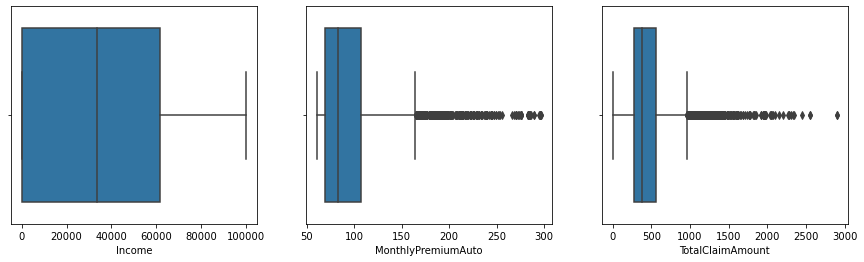

In [46]:
#Continuous Variables
fig,axes = plt.subplots(1,3,figsize = (15,4))
sns.boxplot(data = data, x= 'Income',ax=axes[0])
sns.boxplot(data = data, x= 'MonthlyPremiumAuto',ax=axes[1])
sns.boxplot(data = data, x='TotalClaimAmount',ax=axes[2])
plt.show()

- As we can see that there are outliers in MonthlyPremiumAutoand TotalClaimAmount , usually we remove the outliers for a better model.
- We have seen during EDA, as there is a positive linear realtionship for these two variables to CLV. 
- Since our dataset is related to insurance industry, we must be accept the outliers,as they can be our potential customers.
- Conclusion: No outlier treatment required.

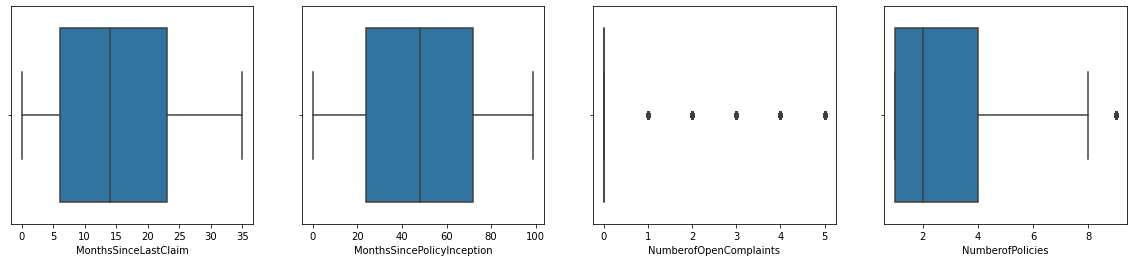

In [47]:
#discrete variables

fig,axes = plt.subplots(1,4,figsize = (20,4))
sns.boxplot(data = data, x= 'MonthsSinceLastClaim',ax=axes[0])
sns.boxplot(data = data, x= 'MonthsSincePolicyInception',ax=axes[1])
sns.boxplot(data = data, x='NumberofOpenComplaints',ax=axes[2])
sns.boxplot(data = data, x='NumberofPolicies',ax=axes[3])
plt.show()

In [48]:
Q1=data['NumberofPolicies'].quantile(0.01)
Q3=data['NumberofPolicies'].quantile(0.99)

IQR=Q3-Q1
low_limit = Q1 - 1.5*IQR
up_limit = Q3 + 1.5*IQR

In [49]:
 data[(data['NumberofPolicies'] > (Q3 + 1.5*IQR))].shape


(0, 22)

In [50]:
Q1=data['NumberofOpenComplaints'].quantile(0.01)
Q3=data['NumberofOpenComplaints'].quantile(0.99)

IQR=Q3-Q1
low_limit = Q1 - 1.5*IQR
up_limit = Q3 + 1.5*IQR


In [51]:
 data[(data['NumberofPolicies'] > (Q3 + 1.5*IQR))].shape

(0, 22)

In [52]:
# There are no extreme outliers and we will see if the threshold should be changed after modelling. 

<h4>3.1.3 Data Clustering</h4>

In [53]:
'''
Before going further, we have to deal with one column we have been not pre-processed so far. LocationGeo.
This column contains the latitude,longitude separated by a delimter comma. 
From business understanding, this might be a good feature. Hence considering to covert this geolocation data 
into zones. Using KNN clustering algorithm to group the data and assign each cluster a unique ID. 
These unique IDs will replace the LocationGeo column.
'''
#Adding LocationGeo another df and transform. 
df1= pd.DataFrame()
df1['LocationGeo']=data['LocationGeo'].unique()
df1['Count_Column'] = df1['LocationGeo'].map(data['LocationGeo'].value_counts()) 
df1[['Lat','Long']]= df1['LocationGeo'].str.split(',', n=1, expand=True)
df1['Lat'] =df1['Lat'].astype(float)
df1['Long']=df1['Long'].astype(float)

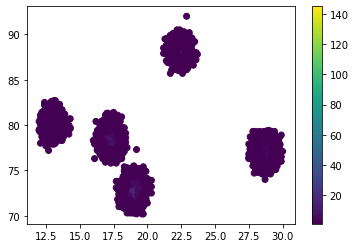

In [54]:
#Plotting the LocationGeo in a heat map.
#import plotly.express as px
#px.density_mapbox(data_frame = df1, lat='Lat', lon='Long', z='Count_Column')
plt.scatter('Lat', 'Long',data=df1,c='Count_Column')
plt.colorbar()
plt.show()

In [55]:
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
import csv

backup_data = data.copy()
data[['Latitude','Longitude']]= data['LocationGeo'].str.split(',', n=1, expand=True)

In [56]:
# Variable with the Longitude and Latitude
X=data.loc[:,['CustomerID','Latitude','Longitude']]
X.head()

,CustomerID,Latitude,Longitude
0,5917,17.7,77.7
1,2057,28.8,76.6
2,4119,21.6,88.4
3,1801,19,72.5
4,9618,19.1,74.7


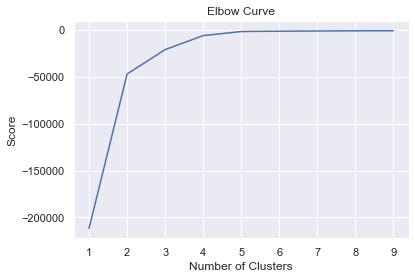

In [57]:
#KNN Elbow method
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = data[['Latitude']]
X_axis = data[['Longitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

n is peaking at 5. This is verifying the 5 clusters in the made heatmap earlier. 

In [58]:
kmeans = KMeans(n_clusters = 5, init ='k-means++')
kmeans.fit(X[X.columns[1:3]]) # Compute k-means clustering.
X['cluster_label'] = kmeans.fit_predict(X[X.columns[1:3]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(X[X.columns[1:3]]) # Labels of each point
centers = kmeans.cluster_centers_
print(centers)

[[28.70834697 77.06012002]
 [18.99634717 72.78819404]
 [17.30597726 78.40715072]
 [22.47995846 88.33125649]
 [12.98792102 80.22636469]]


In [59]:
X.tail(5)

,CustomerID,Latitude,Longitude,cluster_label
9801,3735,12.7,79.4,4
9802,5988,18.6,72.3,1
9803,8767,19.2,74.7,1
9804,9900,19.5,73.9,1
9805,11323,17.2,78.2,2


In [60]:
X=X.drop(['Latitude','Longitude'],axis=1)

In [61]:
clustered_data = data.merge(X, left_on='CustomerID', right_on='CustomerID')
clustered_data.head(5)

,CustomerID,CustomerLifetimeValue,Coverage,Education,EmploymentStatus,Gender,Income,LocationGeo,LocationCode,MaritalStatus,MonthlyPremiumAuto,MonthsSinceLastClaim,MonthsSincePolicyInception,NumberofOpenComplaints,NumberofPolicies,PolicyType,Policy,RenewOfferType,SalesChannel,TotalClaimAmount,VehicleClass,VehicleSize,Latitude,Longitude,cluster_label
0,5917,7824.372789,Basic,Bachelor,Unemployed,F,0.0,"17.7,77.7",Urban,Married,67.0,2,33,0.0,2.0,Personal Auto,Personal L2,Offer2,Branch,267.214383,Four-Door Car,2.0,17.7,77.7,2
1,2057,8005.964669,Basic,College,Employed,M,63357.0,"28.8,76.6",Suburban,Married,101.0,26,42,0.0,5.0,Personal Auto,Personal L2,Offer2,Agent,565.508572,SUV,2.0,28.8,76.6,0
2,4119,8646.504109,Basic,High School or Below,Employed,F,64125.0,"21.6,88.4",Urban,Married,108.0,3,44,0.0,3.0,Personal Auto,Personal L1,Offer2,Branch,369.818708,SUV,1.0,21.6,88.4,3
3,1801,9294.088719,Basic,College,Employed,M,67544.0,"19,72.5",Suburban,Married,116.0,2,15,0.0,3.0,Corporate Auto,Corporate L3,Offer1,Branch,556.800000,SUV,3.0,19,72.5,1
4,9618,5595.971365,Basic,Bachelor,Retired,F,19651.0,"19.1,74.7",Suburban,Married,72.0,3,68,0.0,5.0,Personal Auto,Personal L1,Offer2,Web,345.600000,Two-Door Car,3.0,19.1,74.7,1


In [62]:
clustered_data = clustered_data.drop(['Latitude','Longitude','LocationGeo'],axis=1)

In [63]:
clustered_data.rename(columns = {'cluster_label':'Zones'}, inplace = True)

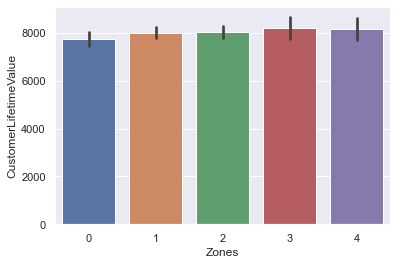

In [64]:
#Effect of Zones on CLV
sns.barplot(x='Zones',y="CustomerLifetimeValue",data=clustered_data)

plt.show()

Wonder if we wasted time on this!

<h3> Statistical Significance</h3>

<AxesSubplot:>

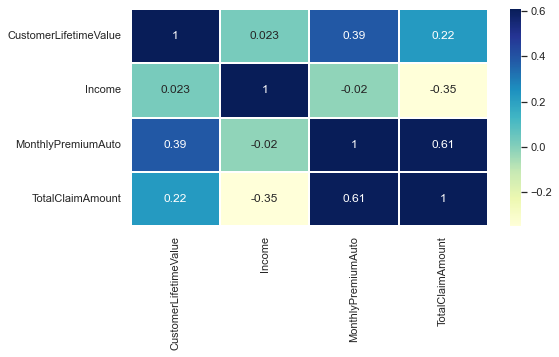

In [65]:
#Correlation matrix for numeric variables

corrmatrix = clustered_data[['CustomerLifetimeValue','Income','MonthlyPremiumAuto','TotalClaimAmount']].corr()
plt.subplots(figsize = (8,4))
sns.heatmap(corrmatrix,vmin= -0.35,vmax = 0.61,annot=True,linewidth = 0.2,cmap='YlGnBu')

In [66]:
#Total Claim Amount and Monthly Premium Amount are correlated, but not high enough to consider dropping it. 

#How each of the independent variables are contributing towards the target variable.

H0:The null hypothesis of the test is the data is normally distributed
HA:The data is not normally distributed

In [67]:
data1 = clustered_data.copy()
import scipy.stats as stats
stats.shapiro(data1['CustomerLifetimeValue'])

ShapiroResult(statistic=0.7045354843139648, pvalue=0.0)

p-value less than 0.05 we reject null hypothesis the data is not normally distributed

We will proceed with non parametric tests since the dependent variable is not normally distributed

In [68]:
columns_cat = data1.select_dtypes('object').columns
no_col = ['NumberofOpenComplaints','NumberofPolicies']

cat_cols = ['Coverage', 'Education', 'EmploymentStatus', 'Gender', 'LocationCode',
       'MaritalStatus', 'PolicyType', 'Policy', 'RenewOfferType',
       'SalesChannel', 'VehicleClass','NumberofOpenComplaints','NumberofPolicies']

In [69]:
manwhiteneyy = []
anova = []

for i in columns_cat:
    if (data1[i].nunique()>2):
        anova.append(i)
    else:
        manwhiteneyy.append(i)
print("Anova:",anova)
print("TTest:",manwhiteneyy)

Anova: ['Coverage', 'Education', 'EmploymentStatus', 'LocationCode', 'MaritalStatus', 'PolicyType', 'Policy', 'RenewOfferType', 'SalesChannel', 'VehicleClass']
TTest: ['Gender']


H0, the distributions of both populations are equal.The alternative hypothesis H1 is that the distributions are not equal.

In [70]:
male=data1[data1['Gender']=='M']['CustomerLifetimeValue']
female=data1[data1['Gender']=='F']['CustomerLifetimeValue']
b =stats.mannwhitneyu(male,female)
print(b)

MannwhitneyuResult(statistic=11930764.0, pvalue=0.6339583500041674)


p-value is greater than 0.05 we failed to reject null hypothesis i.e the mean rank will be the same for both males and females.
we test Gender with non-Paramteric unpaired ttest and we concluded that this feature is not significant to predict traget.

In [71]:
#Kruskal test
#H0:the mean ranks of the groups are the same.
#H1:the mean ranks of the groups are not the same.

Ba=data1[data1['Coverage']=='Basic']['CustomerLifetimeValue']
Ex=data1[data1['Coverage']=='Extended']['CustomerLifetimeValue']
Pr=data1[data1['Coverage']=='Premium']['CustomerLifetimeValue']

In [72]:
c =stats.kruskal(Ba,Ex,Pr)
print(c)  

KruskalResult(statistic=472.8233614277337, pvalue=2.1267263329048554e-103)


p-value < 0.05 to reject H0 - Coverage significant 

In [73]:
Ba=data1[data1['Education']=='Bachelor']['CustomerLifetimeValue']
Co=data1[data1['Education']=='College']['CustomerLifetimeValue']
Hi=data1[data1['Education']=='High School or Below']['CustomerLifetimeValue']
Ma=data1[data1['Education']=='Master']['CustomerLifetimeValue']
Da=data1[data1['Education']=='Doctor']['CustomerLifetimeValue']
d= stats.kruskal(Ba,Co,Hi,Ma,Da)
print(d)

KruskalResult(statistic=11.219903466886922, pvalue=0.024200659801716193)


p-value < 0.05 to reject H0 - Education is significant

In [74]:
Ba=data1[data1['EmploymentStatus']=='Employed']['CustomerLifetimeValue']
Co=data1[data1['EmploymentStatus']=='Unemployed']['CustomerLifetimeValue']
Hi=data1[data1['EmploymentStatus']=='Medical Leave']['CustomerLifetimeValue']
Ma=data1[data1['EmploymentStatus']=='Disabled']['CustomerLifetimeValue']
Da=data1[data1['EmploymentStatus']=='Retired']['CustomerLifetimeValue']
e = stats.kruskal(Ba,Co,Hi,Ma,Da)
print(e)

KruskalResult(statistic=35.501411131966314, pvalue=3.6642419054757866e-07)


p-value < 0.05 reject H0, EmploymentStatus is significant in predicting CLV

In [75]:
Ba=data1[data1['LocationCode']=='Suburban']['CustomerLifetimeValue']
Co=data1[data1['LocationCode']=='Rural']['CustomerLifetimeValue']
Hi=data1[data1['LocationCode']=='Urban']['CustomerLifetimeValue']

g = stats.kruskal(Ba,Co,Hi)
print(g)

KruskalResult(statistic=1.269875064575293, pvalue=0.5299685932092012)


p-value > 0.05 fail to reject H0, Location Code not significant in predicting CLV

In [76]:
Ba=data1[data1['MaritalStatus']=='Married']['CustomerLifetimeValue']
Co=data1[data1['MaritalStatus']=='Single']['CustomerLifetimeValue']
Hi=data1[data1['MaritalStatus']=='Divorced']['CustomerLifetimeValue']

h = stats.kruskal(Ba,Co,Hi)
print(h)

KruskalResult(statistic=15.139241863941148, pvalue=0.0005158879681879683)


p-value < 0.05 reject H0, Marital Status can be significant in predicting CLV

In [77]:
Ba=data1[data1['NumberofOpenComplaints']==0]['CustomerLifetimeValue']
Co=data1[data1['NumberofOpenComplaints']==1]['CustomerLifetimeValue']
Hi=data1[data1['NumberofOpenComplaints']==2]['CustomerLifetimeValue']
Ma=data1[data1['NumberofOpenComplaints']==3]['CustomerLifetimeValue']
Da=data1[data1['NumberofOpenComplaints']==4]['CustomerLifetimeValue']
As=data1[data1['NumberofOpenComplaints']==5]['CustomerLifetimeValue']
o = stats.kruskal(Ba,Co,Hi,Ma,Da,As)
print(o)

KruskalResult(statistic=35.079131844018214, pvalue=1.4509157361261298e-06)


p-value < 0.05 reject H0, Number of Open Complaints can be significant in predicting CLV

In [78]:
Ba=data1[data1['NumberofPolicies']==1]['CustomerLifetimeValue']
Co=data1[data1['NumberofPolicies']==2]['CustomerLifetimeValue']
Hi=data1[data1['NumberofPolicies']==3]['CustomerLifetimeValue']
p = stats.kruskal(Ba,Co,Hi)
print(p)

KruskalResult(statistic=5222.623793895588, pvalue=0.0)


p-value < 0.05 reject H0, Number of Policies can be significant in predicting CLV

In [79]:
Ba=data1[data1['PolicyType']=='Personal Auto']['CustomerLifetimeValue']
Co=data1[data1['PolicyType']=='Corporate Auto']['CustomerLifetimeValue']
Hi=data1[data1['PolicyType']=='Special Auto']['CustomerLifetimeValue']
i = stats.kruskal(Ba,Co,Hi)
print(i)

KruskalResult(statistic=1.067202646716466, pvalue=0.586489025239247)


p-value > 0.05 failed to reject H0, Policy Type may not be significant in predicting CLV

In [80]:
Ba=data1[data1['Policy']=='Personal L3']['CustomerLifetimeValue']
Co=data1[data1['Policy']=='Personal L2']['CustomerLifetimeValue']
Hi=data1[data1['Policy']=='Personal L1']['CustomerLifetimeValue']
Ma=data1[data1['Policy']=='Corporate L3']['CustomerLifetimeValue']
Da=data1[data1['Policy']=='Corporate L2']['CustomerLifetimeValue']
Ca=data1[data1['Policy']=='Corporate L1']['CustomerLifetimeValue']
s1=data1[data1['Policy']=='Special L2']['CustomerLifetimeValue']
s2=data1[data1['Policy']=='Special L3']['CustomerLifetimeValue']
s3=data1[data1['Policy']=='Special L1']['CustomerLifetimeValue']
j =stats.kruskal(Ba,Co,Hi,Ma,Da,Ca,s1,s2,s3)
print(j)

KruskalResult(statistic=7.925173835034309, pvalue=0.44081336128503557)


p-value > 0.05 failed to reject H0, Policy may not be significant in predicting CLV

In [81]:
Ba=data1[data1['RenewOfferType']=='Offer1']['CustomerLifetimeValue']
Co=data1[data1['RenewOfferType']=='Offer2']['CustomerLifetimeValue']
Hi=data1[data1['RenewOfferType']=='Offer3']['CustomerLifetimeValue']
Ma=data1[data1['RenewOfferType']=='Offer4']['CustomerLifetimeValue']
k =stats.kruskal(Ba,Co,Hi,Ma)
print(k)

KruskalResult(statistic=177.91498799088953, pvalue=2.487243652856583e-38)


p-value < 0.05 reject H0, reneeal Offer Type can be significant in predicting CLV

In [82]:
Ba=data1[data1['SalesChannel']=='Agent']['CustomerLifetimeValue']
Co=data1[data1['SalesChannel']=='Branch']['CustomerLifetimeValue']
Hi=data1[data1['SalesChannel']=='Call Center']['CustomerLifetimeValue']
Ma=data1[data1['SalesChannel']=='Web']['CustomerLifetimeValue']
l = stats.kruskal(Ba,Co,Hi,Ma)
print(l)

KruskalResult(statistic=2.704621022786943, pvalue=0.43944257107206186)


p-value > 0.05 failed to reject H0, Sales Channel may not be significant in predicting CLV

In [83]:
Ba=data1[data1['VehicleClass']=='Four-Door Car']['CustomerLifetimeValue']
Co=data1[data1['VehicleClass']=='Two-Door Car']['CustomerLifetimeValue']
Hi=data1[data1['VehicleClass']=='SUV']['CustomerLifetimeValue']
Ma=data1[data1['VehicleClass']=='Sports Car']['CustomerLifetimeValue']
Da=data1[data1['VehicleClass']=='Luxury SUV']['CustomerLifetimeValue']
Ca=data1[data1['VehicleClass']=='Luxury Car']['CustomerLifetimeValue']
m = stats.kruskal(Ba,Co,Hi,Ma,Da,Ca)
print(m)

KruskalResult(statistic=1405.7016955010517, pvalue=8.004612390735793e-302)


p-value < 0.05 reject H0, Vehicle Class can be significant in predicting CLV

In [84]:
p_values = [c[1],d[1],e[1],b[1],g[1],h[1],i[1],j[1],k[1],l[1],m[1],o[1],p[1]]
p_df = pd.DataFrame(p_values,index=(cat_cols),columns=['P_Value'])
p_df = p_df.reset_index()

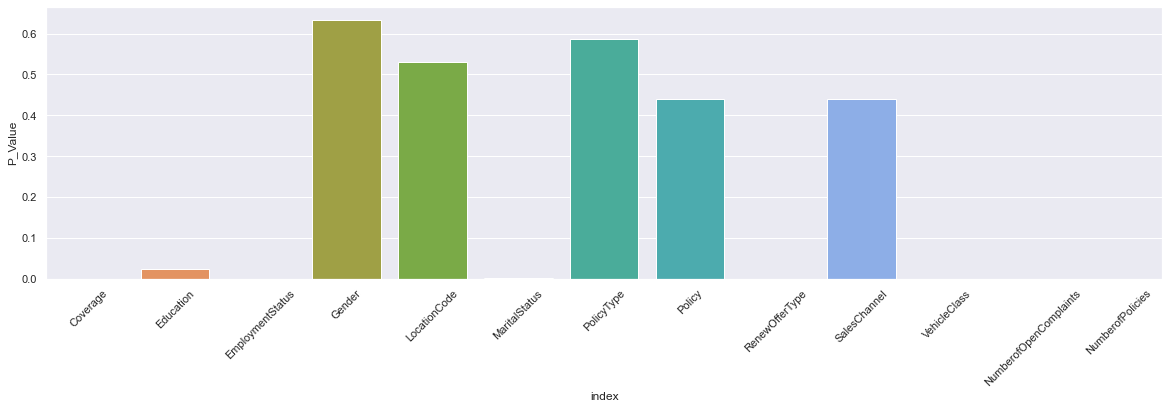

In [85]:
plt.figure(figsize=(20,5))
sns.barplot(x='index',y='P_Value',data=p_df)
plt.xticks(rotation=45)
plt.show()

Coverage,Education,EmploymentStatus,Marital Status, Renew Offer Type, Vehicle class, Vehicle class, Number of open complaints and No of Policies play a significant role in predicting the CLV


<h3>3.2 Data Transformation</h3>

In [86]:
backup_clustered_data = clustered_data.copy()

In [87]:
#Dropping  columns based on EDA and Statistical significance
#numerical features - CustomerID,Income
#Categorical Features  - Gender,LocationCode,PolicyType,Policy,SalesChannel
df_en = clustered_data.drop(['CustomerID','Income','Gender','LocationCode','PolicyType',
                             'Policy','SalesChannel'],axis=1)

<h4>3.2.1 Encoding</h4>

- 'Coverage' - Ordinal - Label Encoding
- 'Education' - Ordinal - Label Encoding
- 'EmploymentStatus' - Nominal- one hot Encoding
- 'Gender' - binary - Label Encoding
- 'LocationCode' - Nominal - One Hot Encoding
- 'MaritalStatus' - Nominal -One Hot Encoding
- 'PolicyType' - Nominal - One hot Encoding
- 'Policy' - Nominal - One hot encoding
- 'RenewOfferType' -  Nominal - One hot encoding
- 'SalesChannel' - Nominal - One hot encoding
- 'VehicleClass' - Nominal - One hot encoding 

In [88]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder

label_en = LabelEncoder()

a=['Coverage','Education']
for i in np.arange(len(a)):
    df_en[a[i]] = label_en.fit_transform(df_en[a[i]])

In [89]:
#Onehot Encoding 
encoded_data = pd.get_dummies(df_en)
encoded_data.head(3)

,CustomerLifetimeValue,Coverage,Education,MonthlyPremiumAuto,MonthsSinceLastClaim,MonthsSincePolicyInception,NumberofOpenComplaints,NumberofPolicies,TotalClaimAmount,VehicleSize,Zones,EmploymentStatus_Disabled,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,RenewOfferType_Offer1,RenewOfferType_Offer2,RenewOfferType_Offer3,RenewOfferType_Offer4,VehicleClass_Four-Door Car,VehicleClass_Luxury Car,VehicleClass_Luxury SUV,VehicleClass_SUV,VehicleClass_Sports Car,VehicleClass_Two-Door Car
0,7824.372789,0,0,67.0,2,33,0.0,2.0,267.214383,2.0,2,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0
1,8005.964669,0,1,101.0,26,42,0.0,5.0,565.508572,2.0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
2,8646.504109,0,3,108.0,3,44,0.0,3.0,369.818708,1.0,3,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0


<h4>3.2.3 Feature Extraction</h4>

In clustering section 3.1.3, have already demonstrated extracting Latitude and longitude
from LocationGeo column. This we have clustered into zones with unique IDs



<h4>3.2.4 Normalization <h4>


In [90]:
#defining the dependent and independent variables 
X=encoded_data.drop(['CustomerLifetimeValue'],axis=1)
y=encoded_data['CustomerLifetimeValue']

In [91]:
#Performing Standard scaling
#from sklearn.preprocessing import StandardScaler
#scale = StandardScaler()
#X = scale.fit_transform(X)

In [92]:
#Performing Min Max scaling 
from sklearn import preprocessing 
X=encoded_data.drop(['CustomerLifetimeValue'],axis=1) 
min_max = preprocessing.MinMaxScaler(feature_range =(0,1))
X = min_max.fit_transform(X)

<h2> 4 Model Building </h2>

In [93]:
encoded_data.shape

(9806, 29)

In [94]:
backup_encoded_data = encoded_data.copy()

In [95]:
#defining the dependent and independent variables 
#X=encoded_data.drop(['CustomerLifetimeValue'],axis=1)
#y=encoded_data['CustomerLifetimeValue']

In [96]:
#Splitting the dataset into train and validation test 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size = 0.3)

<h3>4.1 Linear Regression</h3>

In [97]:
X_train.shape

(6864, 28)

In [98]:
y_train.shape

(6864,)

In [99]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model = lr.fit(X_train,y_train)
print('R^2 score for train:',lr.score(X_train, y_train))
print('R^2 score for test:',lr.score(X_test, y_test))

R^2 score for train: 0.16414312135496711
R^2 score for test: 0.16716895445355207


In [100]:
predictions = model.predict(X_test) #predicting output for x test

In [101]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print('MSE: ',mean_squared_error(y_test,predictions))

MSE:  37856331.11756911


Model Accuracy is very low due to high MSE value 

In [102]:
pd.DataFrame({'Actual': pd.DataFrame(y_test).values.reshape(-1),
              'Predicted value': pd.DataFrame(predictions).values.reshape(-1)}).head()

,Actual,Predicted value
0,10171.477790,7067.904663
1,11095.974450,8970.970336
2,19160.989940,20287.201794
3,3199.824902,6965.296101
4,13295.602840,10718.286123


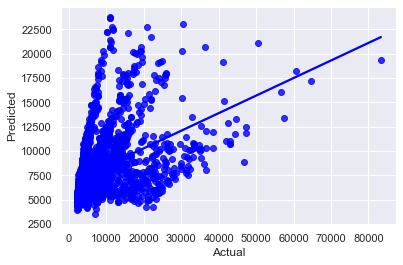

In [103]:
#Regression plot of our model.
#A regression plot is useful to understand the linear relationship between two parameters. 
#It creates a regression line in-between those parameters and then plots a scatter plot of those data points.

sns.regplot(x=y_test,y=predictions,ci=None,color ='Blue')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [104]:
Train_r_sq = model.score(X_train,y_train)
print('coefficient of determination for training data:', Train_r_sq)

Test_r_sq = model.score(X_test,y_test)
print('coefficient of determination for test data:', Test_r_sq)
#Accuracy 
Accuracy=r2_score(y_test,predictions)*100
print('Accuracy: ',Accuracy)

#print('intercept:', model.intercept_)
#print('slope:', model.coef_)

coefficient of determination for training data: 0.16414312135496711
coefficient of determination for test data: 0.16716895445355207
Accuracy:  16.716895445355206


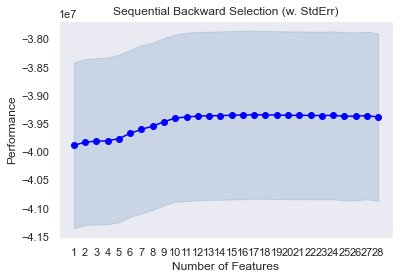

In [105]:
#Forward selection - backward selection 
'''because the forward method produces so-called suppressor effects. 
These suppressor effects occur when predictors are only significant 
when another predictor is held constant.'''

sfs = SFS(lr, k_features='best', forward=False, floating=False, 
          scoring='neg_mean_squared_error', cv=20)
model = sfs.fit(X,y)
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')
plt.title('Sequential Backward Selection (w. StdErr)')
plt.grid()
plt.show()

In [106]:
print('Selected features:', sfs.k_feature_idx_)

Selected features: (0, 1, 2, 5, 6, 8, 9, 11, 15, 16, 19, 20, 21, 23, 24, 25, 26)


In [128]:
X=encoded_data.drop(['CustomerLifetimeValue'],axis=1)
X_new= X.drop(['MonthsSinceLastClaim', 'MonthsSincePolicyInception','TotalClaimAmount',
               'EmploymentStatus_Disabled','EmploymentStatus_Medical Leave','EmploymentStatus_Retired',
               'EmploymentStatus_Unemployed','MaritalStatus_Single','RenewOfferType_Offer1','VehicleClass_Four-Door Car',
               'VehicleClass_Two-Door Car'],axis=1)

In [129]:
#Linear Regression again with dropped features.
#Splitting the dataset into train and validation test 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_new,y,random_state=42,test_size = 0.3)

lr = LinearRegression()
model = lr.fit(X_train,y_train)
print('R^2 score for train:',lr.score(X_train, y_train))
print('R^2 score for test:',lr.score(X_test, y_test))

R^2 score for train: 0.16352169227671876
R^2 score for test: 0.168105830977758


In [130]:
predictions = model.predict(X_test) #predicting output for X test

In [131]:
print('MSE: ',mean_squared_error(y_test,predictions))

#Accuracy 
Accuracy=r2_score(y_test,predictions)*100
print('Accuracy: ',Accuracy)


MSE:  37813745.39972601
Accuracy:  16.8105830977758


Slight improvement after dropping features. 

<h3> 4.2 Rigde and Lasso Regression

In [132]:
from sklearn.linear_model import Ridge, Lasso

ridge=Ridge(alpha=0.1,normalize=True)
ridge.fit(X_train,y_train)
print('Ridge Regression')
print('R^2 score for train:',ridge.score(X_train, y_train))
print('R^2 score for test:',ridge.score(X_test, y_test))
y_pred = ridge.predict(X_test)
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
#Accuracy 
Accuracy=r2_score(y_test,y_pred)*100
print('Accuracy: ',Accuracy) 

Ridge Regression
R^2 score for train: 0.16292466285714258
R^2 score for test: 0.16923239345734375
RMSE: 6145.123066929198
Accuracy:  16.923239345734377


No Improvement 

In [133]:
ridge=Ridge(alpha=0.0000000001,normalize=True)
ridge.fit(X_train,y_train)
print('Ridge Regression-2')
print('R^2 score for train:',ridge.score(X_train, y_train))
print('R^2 score for test:',ridge.score(X_test, y_test))
y_pred = ridge.predict(X_test)
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
#Accuracy 
Accuracy=r2_score(y_test,y_pred)*100
print('Accuracy: ',Accuracy) 

Ridge Regression-2
R^2 score for train: 0.16352169227671876
R^2 score for test: 0.16810583097997778
RMSE: 6149.288202680463
Accuracy:  16.810583097997778


In [134]:
lasso = Lasso(random_state=1)
lasso.fit(X_train,y_train)
print('Lasso Regression')
print('R^2 score for train:',lasso.score(X_train, y_train))
print('R^2 score for test:',lasso.score(X_test, y_test))
y_pred = lasso.predict(X_test)
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
#Accuracy 
Accuracy=r2_score(y_test,y_pred)*100
print('Accuracy: ',Accuracy) 

Lasso Regression
R^2 score for train: 0.163503467202751
R^2 score for test: 0.16798786886083783
RMSE: 6149.724170007617
Accuracy:  16.798786886083782


No improvement in accuracy using Ridge and Lasso Regression

<h3>4.3 Decision Tree

In [135]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=1)

dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print("MAE",mean_absolute_error(y_test,y_pred))
print('R-squared:',r2_score(y_test,y_pred)) 

RMSE: 5697.799024273085
MAE 2027.1853255871854
R-squared: 0.28577896379151446


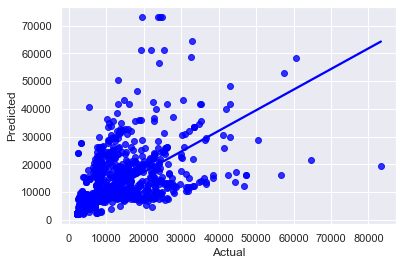

In [136]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='Blue')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [137]:
Train_r_sq = model.score(X_train,y_train)
print('coefficient of determination for training data:', Train_r_sq)

Test_r_sq = model.score(X_test,y_test)
print('coefficient of determination for test data:', Test_r_sq)
#Accuracy 
Accuracy=r2_score(y_test,y_pred)*100
print('Accuracy: ',Accuracy)


coefficient of determination for training data: 0.16352169227671876
coefficient of determination for test data: 0.168105830977758
Accuracy:  28.577896379151447


<h3>4.4 Random Forest 

In [138]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=1)

rf.fit(X_train,y_train)

y_pred=rf.predict(X_test)
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print("MAE",mean_absolute_error(y_test,y_pred))
print('R-squared:',r2_score(y_test,y_pred)) 
Accuracy=r2_score(y_test,y_pred)*100
print('Accuracy: ',Accuracy)

RMSE: 4119.811230811177
MAE 1724.7501221822881
R-squared: 0.6266011132591951
Accuracy:  62.66011132591951


In [139]:
#Feature importanc
pd.Series(rf.feature_importances_, index=X_new.columns).sort_values(ascending=False)*100


NumberofPolicies             45.463748
MonthlyPremiumAuto           29.430754
Zones                         4.269471
Education                     4.037208
VehicleSize                   2.449139
NumberofOpenComplaints        2.049643
EmploymentStatus_Employed     1.739594
Coverage                      1.553218
RenewOfferType_Offer2         1.552849
MaritalStatus_Married         1.484603
RenewOfferType_Offer3         1.249561
MaritalStatus_Divorced        1.045172
RenewOfferType_Offer4         0.964824
VehicleClass_SUV              0.950611
VehicleClass_Luxury SUV       0.710790
VehicleClass_Sports Car       0.689944
VehicleClass_Luxury Car       0.358873
dtype: float64

In [140]:
from sklearn.ensemble import AdaBoostRegressor
adaboost = AdaBoostRegressor(
    RandomForestRegressor(max_depth=5,criterion='mse'),
    n_estimators=150
)
adaboost.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=RandomForestRegressor(criterion='mse',
                                                       max_depth=5),
                  n_estimators=150)

In [141]:
y_pred = adaboost.predict(X_test)
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print("MAE",mean_absolute_error(y_test,y_pred))
print('R-squared:',r2_score(y_test,y_pred))

RMSE: 4353.963317384941
MAE 2253.355108488093
R-squared: 0.5829502012738674


In [142]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb.fit(X_train,y_train)
y_pred = gb.predict(X_test)

print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print("MAE",mean_absolute_error(y_test,y_pred))
print('R-squared:',r2_score(y_test,y_pred)) 
Accuracy=r2_score(y_test,y_pred)*100
print('Accuracy: ',Accuracy)

RMSE: 3903.613685652338
MAE 1779.0755850009207
R-squared: 0.6647629206871741
Accuracy:  66.47629206871741


In [143]:
from xgboost import XGBRegressor
XGB = XGBRegressor()
XGB.fit(X_train,y_train)
y_pred = XGB.predict(X_test)

print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print("MAE",mean_absolute_error(y_test,y_pred))
print('R-squared:',r2_score(y_test,y_pred)) 
Accuracy=r2_score(y_test,y_pred)*100
print('Accuracy: ',Accuracy)

RMSE: 4175.168039341709
MAE 2007.7627636122058
R-squared: 0.6164991744528688
Accuracy:  61.64991744528688


Of all the models we decided to choose gradient boosting as the next model, and furthur tweak the hyper parameter's of the model and also put this boosting model into bagging regressor and check for the model accuracy.

In [144]:
#Hyperparameter Tuning of GB Regressor
from sklearn.model_selection import GridSearchCV

#Tree-Specific Parameters: These affect each individual tree in the model.
#Boosting Parameters: These affect the boosting operation in the model.
#Miscellaneous Parameters: Other parameters for overall functioning.

#Fix learning rate and number of estimators for tuning tree-based parameters
#initial values 
#min_samples_split = 500 #0.5 to 1% of total values 
#min_samples_leaf = 50
#max_depth = 5 #(5-8)
#max_features = 'sqrt' 
#subsample = 0.8
#learning_rate= 0.3

param_test1 = {'n_estimators':range(20,100,20)}
gsearch1 = GridSearchCV(estimator = GradientBoostingRegressor(learning_rate=0.3,
                                                               min_samples_split=500,min_samples_leaf=50,
                                                               max_depth=5,max_features='sqrt',subsample=0.8,
                                                               random_state=10), 
param_grid = param_test1,n_jobs=4, cv=5,error_score='raise')

In [145]:
X_train,X_test,y_train,y_test = train_test_split(X_new,y,random_state=42,test_size = 0.3)
gsearch1.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
             estimator=GradientBoostingRegressor(learning_rate=0.3, max_depth=5,
                                                 max_features='sqrt',
                                                 min_samples_leaf=50,
                                                 min_samples_split=500,
                                                 random_state=10,
                                                 subsample=0.8),
             n_jobs=4, param_grid={'n_estimators': range(20, 100, 20)})

In [146]:
gsearch1.best_params_, gsearch1.best_score_


({'n_estimators': 80}, 0.6322313929512038)

In [147]:
#Tuning tree-specific parameters
#Tune max_depth and num_samples_split
#Tune min_samples_leaf
#Tune max_features

#Tune max_depth and num_samples_split
param_test2 = {'max_depth':range(5,16,2), 'min_samples_split':range(200,1001,200)}
gsearch2 = GridSearchCV(estimator = GradientBoostingRegressor(learning_rate=0.3, n_estimators=80,
                                                               max_features='sqrt', subsample=0.8,
                                                               random_state=10), 
param_grid = param_test2,n_jobs=4, cv=5,error_score='raise')


In [148]:
gsearch2.fit(X_train,y_train)
gsearch2.best_params_, gsearch2.best_score_

({'max_depth': 5, 'min_samples_split': 800}, 0.6387104359547073)

In [149]:
#last tree-parameters
param_test4 = {'max_features':range(7,20,2)}
gsearch4 = GridSearchCV(estimator = GradientBoostingRegressor(learning_rate=0.3, n_estimators=80,
                                                              max_depth=5, min_samples_split=800, min_samples_leaf=50, 
                                                              subsample=0.8, random_state=10),
param_grid = param_test4,n_jobs=4, cv=5)

gsearch4.fit(X_train,y_train)

gsearch4.best_params_, gsearch4.best_score_

({'max_features': 15}, 0.6469379204183875)

In [152]:
#last tree-parameters
param_test5 = {'subsample':[0.6,0.7,0.75,0.8,0.85,0.9]}
gsearch5 = GridSearchCV(estimator = GradientBoostingRegressor(learning_rate=0.3, n_estimators=80,
                                                              max_depth=5, min_samples_split=800,
                                                              min_samples_leaf=50, subsample=0.8,
                                                              random_state=10,max_features=15),
param_grid = param_test5,n_jobs=4, cv=5)

gsearch5.fit(X_train,y_train)

gsearch5.best_params_, gsearch5.best_score_

({'subsample': 0.85}, 0.647646047607186)

Tuning is not helping in increasing the accuracy. Therefore we shouls try to use this model in a boosting regressor. 

<h4>Final Model - Boosting and Bagging

In [154]:
from sklearn.ensemble import BaggingRegressor

gbr2 = GradientBoostingRegressor()
br2 = BaggingRegressor(gbr2)
#Finding the best sample 
print('Test score, Train Score')
temp = 0
for j in range(1,20):
    NX_train,NX_test,Ny_train,Ny_test = train_test_split(X,y,test_size=0.3,random_state=j)
    br2.fit(NX_train,Ny_train)
    test_score = br2.score(NX_test,Ny_test)
    train_score = br2.score(NX_train,Ny_train)
    if test_score>temp:
        temp = test_score
        print(j,train_score,temp)


Test score, Train Score
1 0.7059920195368314 0.6576185286634756
2 0.712239322610687 0.6631522113876107
5 0.7041737004903881 0.6704686971718494
16 0.7034355059112668 0.6771461800720914


In [155]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=87)
br2.fit(X_train,y_train)
y_pred_br2 = br2.predict(X_test)

In [156]:
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred_br2)))
print("MAE",mean_absolute_error(y_test,y_pred_br2))
print('R-squared:',r2_score(y_test,y_pred_br2)) 
Accuracy=r2_score(y_test,y_pred_br2)*100
print('Accuracy: ',Accuracy)

RMSE: 3875.8894889458707
MAE 1855.839778025323
R-squared: 0.6533849661063424
Accuracy:  65.33849661063425


<h3>Hyperparameter tuning of random forest </h3>


In [160]:

rf = RandomForestRegressor()
params = {
        'max_depth' : [10,20,30],
        
        'n_estimators' : [100,200,50],
        
        'bootstrap' : [True, False]
        
        }

grid = GridSearchCV(estimator = rf, param_grid=params, cv = 5, n_jobs = -1, return_train_score = True )
grid.fit(X,y)
grid.best_params_

{'bootstrap': True, 'max_depth': 20, 'n_estimators': 200}

In [161]:
rf = RandomForestRegressor(**grid.best_params_)

rf.fit(X_train,y_train)

y_pred=rf.predict(X_test)
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print("MAE",mean_absolute_error(y_test,y_pred))
print('R-squared:',r2_score(y_test,y_pred))

RMSE: 3846.7654391542633
MAE 1645.2872523712517
R-squared: 0.6585744362614769


Randomforest has responded to hyperparameter tuning.
However the best model accuracy is given by Gradient boosting regressor.(66.47629206871741)